<a href="https://colab.research.google.com/github/Sahil-Singh2002/Analtical-and-Computational-2/blob/master/Chapter_2_Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Using Common List Object Methods:

We’ll look at some common list object methods,
including append(), index(), insert(), and count(). To practice using them, start by
creating a blank list.

In [ ]:
my_list = []

List object method append().It adds an item to
the end of the list.


In [ ]:
my_list.append('Pay bills')
my_list.append('Tidy up')
my_list.append('Walk the dog')
my_list.append('Cook dinner')

List now contains four items, in the order in which they were
appended.

In [ ]:
print(my_list)

['Pay bills', 'Tidy up', 'Walk the dog', 'Cook dinner']


Each element oin the list has a numerical key known as an index. Using a zero based indexing.

To access an individual item from a list, specify the name of list, followed by the index in square brackets.

In [ ]:
print(my_list[0])

Pay bills


Say you want to add a new
chore to your to-do list between walking the dog and cooking dinner. To
make this insertion, you first use the index() method to determine the index of
the item before which you want to insert the new item.

In [ ]:
i = my_list.index(my_list[3])
my_list.insert(i, "Go meet friends")
print(my_list)

['Pay bills', 'Tidy up', 'Walk the dog', 'Go meet friends', 'Cook dinner']


The new chore is added to the list at the specified index, shifting all
subsequent chores down by one.

Because lists allow for duplicate items, you may need to check how many
times a certain item appears in a list. This can be done with the count()
method.

In [ ]:
print(my_list.count('Tidy up'))

1


But it
might be a good idea to include this item in your daily list more than once!

## Using Slice Notation

To access a range of items from a sequential data type such as a
list by using slice notation. To take a slice of a list, specify the index of the
starting position and the index of the ending position plus 1.


In [ ]:
print(my_list[0:3])

['Pay bills', 'Tidy up', 'Walk the dog']


The result is a list of the items with indices 0 through 2.

In [ ]:
#Same as the one above
print(my_list[:3])

['Pay bills', 'Tidy up', 'Walk the dog']


If you omit the end index, the slice will continue through the end of the
list.

In [ ]:
print(my_list[3:])

['Go meet friends', 'Cook dinner']


You can omit both indices, in which case you’ll get a copy of the
whole list.

In [ ]:
print(my_list[:])

['Pay bills', 'Tidy up', 'Walk the dog', 'Go meet friends', 'Cook dinner']


Slice notation is not limited to extracting a subsequence from a list. You
can also use it instead of the append() and insert() methods to populate a list with
data. Here, for example, you add two items to the end of your list

In [ ]:
my_list[len(my_list):] = ["Mow the Lawn","Water plants"]
# len() function returns the number of items in the list.

len() function returns the number of items in the list. Also the
index of the first unused position outside the list. Add new
items starting from this index.

In [ ]:
print(my_list)

['Pay bills', 'Tidy up', 'Walk the dog', 'Go meet friends', 'Cook dinner', 'Mow the Lawn', 'Water plants']


Similarly, you can remove items using the del command.

In [ ]:
del my_list[5:]
""" This removes the items with indices 5 and above,
 thus returning the list to its previous form """
print(my_list)

['Pay bills', 'Tidy up', 'Walk the dog', 'Go meet friends', 'Cook dinner']


##Using a List as a Queue

A queue is an abstract data type that can be implemented using the list data
structure. One end of a queue is always used to insert items (enqueue), and
the other is used to remove them (dequeue following the (FIFO) methodology. You can see it beeing used in warehouseing: first products that arrive at the warehouse are the first
products to leave. Organising sales that way, helps prevent product expiration, by making sure the older products are sold first. Turn python list into a queue using Python's deque object. 

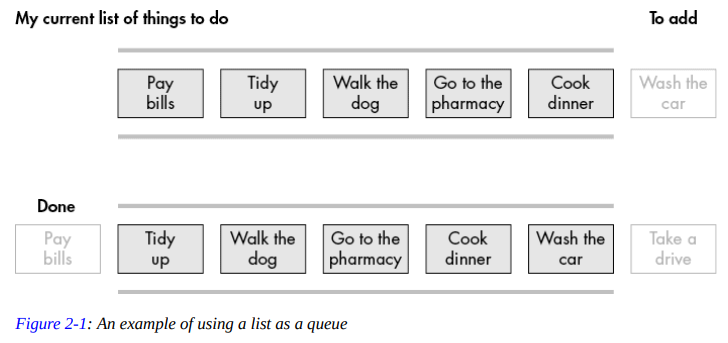

I first turned the my_list object into a deque object. The *deque()*
object constructor adds a set of methods to the list object being passed into
it, making it easier to use that list as a queue. In this example i add a new element to the right siode of the queue with the *append()* method, then you remove an item from the left side of the queue using the popleft()
method.

In [ ]:
from collections import deque
queue = deque(my_list)
queue.append("Wash the car")
print(queue.popleft(), "-Done!")
my_list_new = list(queue)
print(my_list_new)

Pay bills -Done!
['Tidy up', 'Walk the dog', 'Go meet friends', 'Cook dinner', 'Wash the car']


##Using a List as a Stack

Like a queue, a stack is an abstract data structure that you can organize on
top of a list. A stack implements the LIFO methodology, where the last item added is rthe first item retrieved. You would complete the tasks in reverse order, starting with the rightmost task.


In [ ]:
my_list = ['Pay bills', 'Tidy up', 'Walk the dog', 'Go to the pharmacy', 'Cook dinner']
stack = []
for task in my_list:
  stack.append(task)
while stack:
  print(stack.pop(),"- Done!")
print("\nThe stack is empty")

Cook dinner - Done!
Go to the pharmacy - Done!
Walk the dog - Done!
Tidy up - Done!
Pay bills - Done!

The stack is empty


In the for loop, you push the tasks from the to-do list into a stack defined
as another list, starting from the first task. This is an example of using append()
in a loop to dynamically populate an empty list. In the while loop, remove the tasks from the stack starting from the last one, using the pop() method. Which removes the last item from a list and returns the removed item.

##Using Lists and Stacks for Natural Language Processing

The following script uses spaCy to implement the leading open source
Python library for natural language processing

In [ ]:
import spacy
txt = 'List is a ubiquitous data structure in the Python programming language.'
nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)
stk=[]
for w in doc:
  if w.pos_ == 'NOUN' or w.pos_ == 'PROPN':
    stk.append(w.text)
  elif (w.head.pos_ == 'NOUN' or w.head.pos_ == 'PROPN') and (w in w.head.lefts):
    stk.append(w.text)
  elif stk:
    chunk = ' '
    while stk:
      chunk = stk.pop() + ' ' +chunk
    print(chunk.strip())

List
a ubiquitous data structure
the Python programming language


##Improvements with List Comprehensions

Use list comprehensions to
improve our noun chunk extraction algorithm, by making significant enhancements to existing
code. The enhancements will be quite compact because we have the code above.

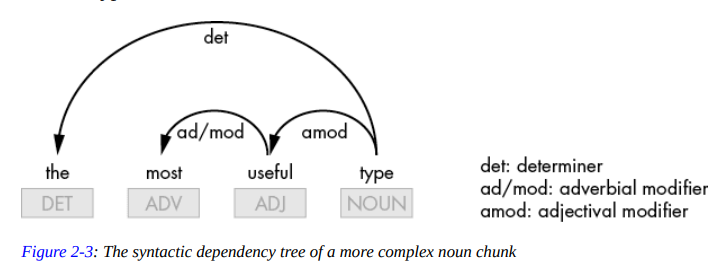


In [ ]:
txt = 'List is arguably the most useful type in the Python programming language.'
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)
head_lefts = [t.text if t in t.head.lefts else 0 for t in doc]
print(head_lefts)


['List', 0, 0, 'the', 'most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]


Notice that the list contains one more element than there are
words in the sentence. This is because spaCy actually breaks the text up into
tokens, which may be words or punctuation marks. The final 0 in the list
represents the period at the end of the sentence.


In [ ]:
"create a series of text fragments, where each fragment starts at a certain position and continues until the end of the text."

for w in doc:
  head_lefts = [t.text if t in t.head.lefts else 0 for t in doc[w.i : ]]
  print(head_lefts)

['List', 0, 0, 'the', 'most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 0, 'the', 'most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 'the', 'most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
['the', 'most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
['most', 'useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
['useful', 0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 0, 'the', 'Python', 'programming', 0, 0]
[0, 'the', 'Python', 'programming', 0, 0]
['the', 'Python', 'programming', 0, 0]
['Python', 'programming', 0, 0]
['programming', 0, 0]
[0, 0]
[0]


You must analyze each fragment next, looking for the first zero. The
words up to and including that zero could potentially be a noun chunk

In [ ]:
txt = 'List is arguably the most useful type in the Python programming language.'
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(txt)
stk = []
for w in doc:
  head_lefts = [1 if t in t.head.lefts else 0 for t in doc[w.i:]]
  i0 = 0
  try: i0 = head_lefts.index(0)
  except ValueError: pass
  i1 = 0
  if i0 > 0:
    noun = [1 if t.pos_== 'NOUN' or t.pos_== 'PROPN' else 0 for t in 
            reversed(doc[w.i:w.i+i0 +1])]
    try: i1 = noun.index(1)+1 
    except ValueError: pass
  if w.pos_ == 'NOUN' or w.pos_ == 'PROPN':
    stk.append(w.text)
  elif (i1>0):
    stk.append(w.text)
  elif stk:
    chunk = " "
    while stk:
      chunk = stk.pop()+ " " +chunk
    print(chunk.strip())




List
the most useful type
the Python programming language


## Tuples

A tuple is an ordered collection of objects, it can be immutable(can't change it). The items in a tuple are separated by commas and can optionally be enclosed in
parentheses.

Typically used to store collections of heterogeneous data; that
is, data of different types, such as the make, model, and year of a car.

## A list of Tuples

It’s common to nest Python data structures inside each other. You can have a list where each element is tuple, allowing you to assign more than one attribute to each element in the list.

Say you want to assign a start
time to each task in the to-do list you created earlier in the chapter. Each
item in the list will become a data structure unto itself, consisting of two
elements: the description of a task and its scheduled start time.



In [ ]:
task_list =  ['Pay bills', 'Tidy up', 'Walk the dog', 'Go to the pharmacy', 'Cook dinner']
tm_list = ['8:00', '8:30', '9:30', '10:00', '10:30']

sched_list = [(tm,task) for tm, 
              task in zip(tm_list,task_list)]
print(sched_list)
print(sched_list[1])

[('8:00', 'Pay bills'), ('8:30', 'Tidy up'), ('9:30', 'Walk the dog'), ('10:00', 'Go to the pharmacy'), ('10:30', 'Cook dinner')]
('8:30', 'Tidy up')


##Immutability

An important thing to remember about tuples is that they’re immutable. That
is, you can’t modify them. For example, if you try to change the start time
for one of your chores:

In [ ]:
sched_list[1][0] = '9:00'

TypeError: ignored

You get this because its immutable, they are not suitable for holding data values that need to be updated periodically.

# Dictionaries

Another widely used built-in data structure in Python.
Dictionaries are mutable, unordered collections of key-value pairs, where
each key is a unique name that identifies an item of data, the value. Like tuples, are useful for storing heterogeneous data about real-world objects. 

## A list of Dictionaries

Like other data structures, dictionaries can be nested inside other structures.
Your to-do list, when implemented as a list of dictionaries, might look like this:

In [ ]:
dict_list = [
    {'time': '8:00', 'name': 'Pay bills'},
    {'time': '8:30', 'name': 'Tidy up'},
    {'time': '9:30', 'name': 'Walk the dog'},
    {'time': '10:00', 'name': 'Go to the pharmacy'},
    {'time': '10:30', 'name': 'Cook dinner'}
]

Dictionaries are mutable, which means that you can easily
change the value in a key-value pair

In [ ]:
dict_list[1]['time'] = '9:00'


## Adding to a Dictionary with setdefault()

setdefault() method provides a convenient way to add new data to a
dictionary. It takes a key-value pair as its parameter. If the specified key
already exists, the method simply returns the current value of that keyIf the
key doesn’t exist, setdefault() inserts the key with the specified value.


In [ ]:
car = {
    'brand':'Volkswagen',
    'style':'Sedan',
    'model':'Jetta'
}
# a new dic.

print(car.setdefault("model","Passat"))
#a new model key with a value of Passat using setdefault()

print(car)

Jetta
{'brand': 'Volkswagen', 'style': 'Sedan', 'model': 'Jetta'}


However, if you specify a new key, setdefault() inserts the key-value pair and returns the value

In [ ]:
print(car.setdefault('year',2022))
print("--------------------------")
print(car)

2022
--------------------------
{'brand': 'Volkswagen', 'style': 'Sedan', 'model': 'Jetta', 'year': 2022}


The setdefault() method relieves you from having to
manually check whether the key in the key-value pair you want to insert is
already in the dictionary. You can safely try to insert a key-value pair into a
dictionary without the risk of overwriting the value of a key that already
exists.

Let’s look at a practical example.
Counting the number of occurrences of each word in a text phrase is a
common task in NLP.

In [ ]:
txt = '''Python is one of the most promising programming languages today. Due to the simplicity
of Python syntax, many researchers and scientists prefer Python over many other languages.'''
# first step is remove the punctuation, without this "languages" and "languages." would count as two separate words.

txt = txt.replace('.', '').replace(',', '')

#now put it into a list

lst = txt.split()
print(lst)

#now count how many times each word in the list happens. By:

dct = {}
for w in lst:
  c = dct.setdefault(w,0)
  dct[w] = 1+dct[w]

#first we create and empty dic. and then add key-value to it, using the words for the list as the keys.

['Python', 'is', 'one', 'of', 'the', 'most', 'promising', 'programming', 'languages', 'today', 'Due', 'to', 'the', 'simplicity', 'of', 'Python', 'syntax', 'many', 'researchers', 'and', 'scientists', 'prefer', 'Python', 'over', 'many', 'other', 'languages']


In [ ]:
dct_sorted = dict(sorted(dct.items(),key=lambda x: x[1],reverse=True))

print(dct_sorted)

{'Python': 3, 'of': 2, 'the': 2, 'languages': 2, 'many': 2, 'is': 1, 'one': 1, 'most': 1, 'promising': 1, 'programming': 1, 'today': 1, 'Due': 1, 'to': 1, 'simplicity': 1, 'syntax': 1, 'researchers': 1, 'and': 1, 'scientists': 1, 'prefer': 1, 'over': 1, 'other': 1}


##Loading JSON into a Dictionary

Loading JSON into a Dictionar, here’s how to load a string representing a
JSON document into a dictionary using only the assignment operator.

In [ ]:
d = {"PONumber"   :2608,
     "ShippingInstructions" : {"name" : "John Silver",
                               "Address": { "street" : "426 Light Street",
                                            "city" : "South San Francisco",
                                           "state" : "CA",
                                           "zipCode" : 99237,
                                           "country" : "United States of America" },
                               "Phone":[ {"type" : "Office", "number" : "809-123-9309"},
                                        { "type" : "Mobile", "number" : "417-123-4567"}
                                        ]
                               }
     }
import json
with open("po.json","w") as outfile:
  json.dump(d,outfile)
#use the json.load() method to load the contents of a JSON file directly into a Python dictionary

with open("po.json", ) as fp:
  d = json.load(fp)
  

#Sets

Unordered collection of unique items. Duplicate items are
not allowed in a set. A set is defined with curly brackets containing items
separated by commas.

##Removing Duplicates from Sequences

Since members of a set must be unique, sets are useful when you need to
remove duplicate items from a list or a tuple.

In [ ]:
lst = ['John Silver','Tim Jemison','John Silver',"Maya Smith"]
print(lst)
print("-------------------------------------")
lst_1 = list(set(lst))
print(lst_1)
print("-------------------------------------")
#simply convert the original list to a set and then back to a list.
#The set() operater automatically removes the duplicates. This however does not preserve the order.

#To perform the same operation without losing the initial order, use Python’s sorted() function

lst_2 = list(sorted(set(lst),key = lst.index))
print(lst_2) 


['John Silver', 'Tim Jemison', 'John Silver', 'Maya Smith']
-------------------------------------
['Maya Smith', 'Tim Jemison', 'John Silver']
-------------------------------------
['John Silver', 'Tim Jemison', 'Maya Smith']


##Performing Common Set Operations

Set objects come with methods for performing common math operations on
sequences, like unions and intersections. These methods let you easily
combine sets or extract the elements shared by multiple sets.

Imagine that you need to classify a huge number of photos into groups
based on what’s in the photos. To automate this task, you might start with a
visual recognition tool like Clarifai API that will generate a set of descriptive
tags for each photo. The sets of tags can then be compared with each other
using the intersection() method.

In [ ]:
photo1_tags = {'coffee', 'breakfast', 'drink', 'table', 'tableware', 'cup', 'food'}
photo2_tags = {'food', 'dish', 'meat', 'meal', 'tableware', 'dinner', 'vegetable'}
intersection = photo1_tags.intersection(photo2_tags)
if len(intersection) >= 2:
  print("The photos contain similar objects. Which are: " + str(intersection))

The photos contain similar objects. Which are: {'tableware', 'food'}


#EXERCISE: IMPROVED PHOTO TAG ANALYSIS

This section encourages you to practice what you’ve learned in this chapter. While continuing
with the example using sets from the previous section, you’ll also need to use dictionaries and
lists.
In the previous example, you compared the descriptive tags of just two photos, determining
their common tags by intersection. Let’s enhance the functionality of the code so that it can
process an arbitrary number of photos, grouping them into categories generated on the fly based
on intersecting tags.
As the input, suppose you have the following list of dictionaries, where each dictionary
represents a photo (of course, you might create your own list containing many more items). The
list of dictionaries used here is available for download from the GitHub repository accompanying
this book, at https://github.com/pythondatabook/sources/blob/main/ch2/list_of_dicts.txt:

# New section